In [12]:
import IPython.display as ipd # Para reproducir audio en el Jupyter Notebook
import numpy as np #Libreria para manejo de vectores y matrices
from scipy.io import wavfile #Importar Modulo scipy para leer y grabar audio
import matplotlib.pyplot as plt #Libreria para realizar graficos
from scipy.fftpack import fft # modulo para calcular la transformada de fourier

In [13]:

AudioName = "audio.wav" # Archivo de Audio
fs, Audiodata = wavfile.read(AudioName) #Leo el archivo de audio
print(f'Duracion = {Audiodata.shape[0]/fs} , Frecuencia de Muestreo = {fs} [=] Muestras/Seg' \
      f', Wav format = {Audiodata.dtype}') #Doy informacion del audio


Duracion = 20.0 , Frecuencia de Muestreo = 48000 [=] Muestras/Seg, Wav format = int16


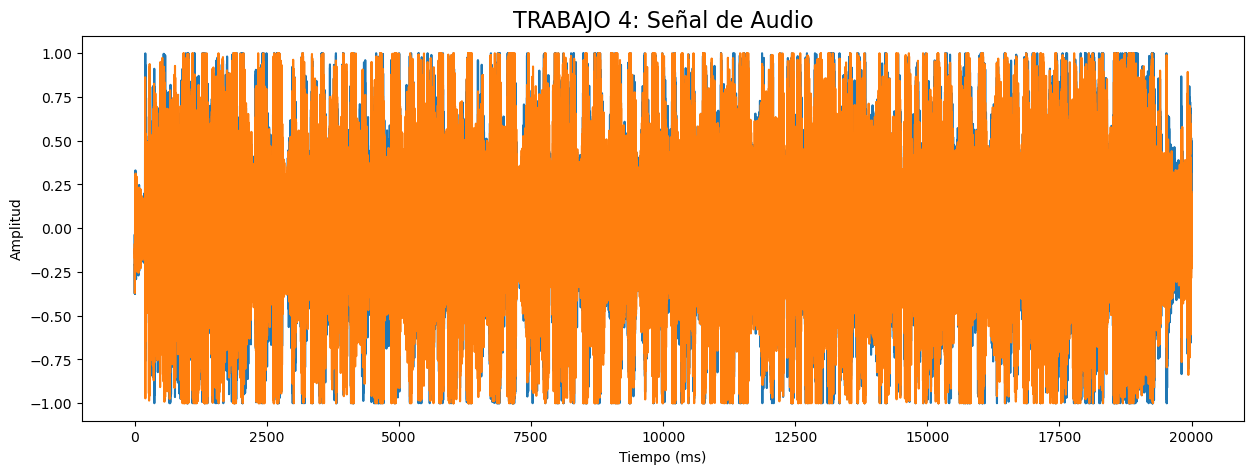

In [14]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
# Definir los valores de los datos de amplitud entre [-1 : 1] Audiodata.dtype es int16
AudiodataScaled = Audiodata/(2**15)

#definir los valores del eje x en milisegundos
timeValues = np.arange(0, len(AudiodataScaled),1)/ fs # Convertir Muestras/Seg a Segundos
timeValues = timeValues * 1000  #Escala de tiempo en milisegundos

plt.plot(timeValues, AudiodataScaled);plt.title('TRABAJO 4: Señal de Audio',size=16)
plt.ylabel('Amplitud'); plt.xlabel('Tiempo (ms)'); plt.xlabel('Tiempo (ms)');plt.show()

Tipo de datos de la fft = complex128 un valor cualquiera es = [-1.07400119e-05-0.j  2.45310366e-06-0.j]


Text(0.5, 0, 'Frecuencia (Hz)')

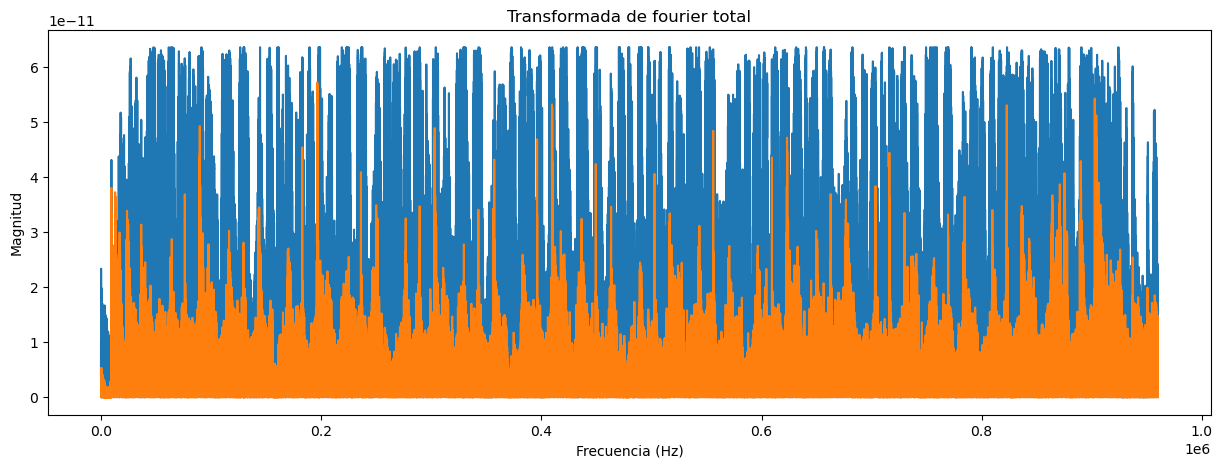

In [24]:
Audiodata = Audiodata / (2.**15) # definir amplitud de los datos entre [-1 : 1]
n = len(Audiodata) 
AudioFreq = fft(Audiodata) # Calcular la transformada de Fourier

# La salida de la FFT es un array de numeros complejos
print(f'Tipo de datos de la fft = {AudioFreq.dtype} un valor cualquiera es = {AudioFreq[100]}')

# los numeros complejos se representan en Magnitud y fase
MagFreq = np.abs(AudioFreq) # Valor absoluto para obtener la magnitud

# Escalar por el numero de puntos para evitar que los valores de magnitud
# dependan del tamaño de la señal o de su frecuencia de muestreo
MagFreq = MagFreq / float(n)

plt.plot(MagFreq) #Espectro de magnitud
plt.ylabel('Magnitud'); plt.title('Transformada de fourier total'); plt.xlabel('Frecuencia (Hz)')



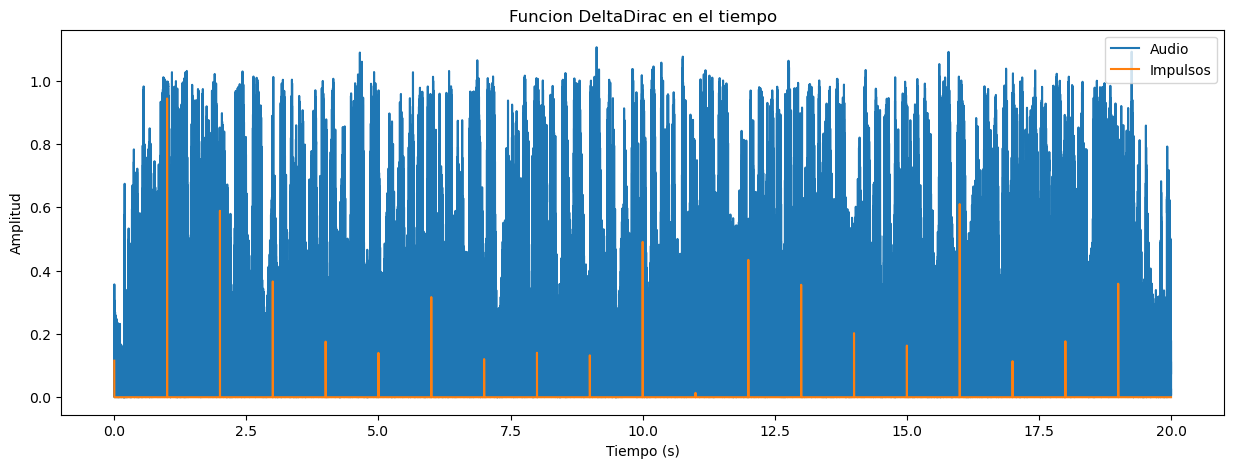

In [25]:
# Importamos las librerías necesarias
import librosa

# Cargamos el archivo de audio
audio, sr = librosa.load("audio.wav")

# Definimos el delta y el intervalo
delta = 0.2
intervalo = 1

# Creamos un vector de tiempo con el mismo tamaño que el audio
t = np.linspace(0, len(audio) / sr, len(audio))

# Creamos un vector vacío para almacenar los impulsos
impulsos = np.zeros_like(audio)

# Recorremos el vector de tiempo con un paso igual al intervalo
for i in range(0, len(t), int(intervalo * sr)):
    # Buscamos el índice más cercano al tiempo actual
    idx = np.argmin(np.abs(t - t[i]))
    # Asignamos la amplitud del audio al vector de impulsos
    impulsos[idx] = audio[idx]
    # Buscamos el índice más cercano al tiempo actual más el delta
    idx_delta = np.argmin(np.abs(t - (t[i] + delta)))
    # Asignamos cero al vector de impulsos para terminar el impulso
    impulsos[idx_delta] = 0

# Graficamos el audio y los impulsos
plt.plot(t, np.abs(audio), label="Audio")
plt.plot(t, np.abs(impulsos), label="Impulsos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title('Funcion DeltaDirac en el tiempo')
plt.legend()
plt.show()


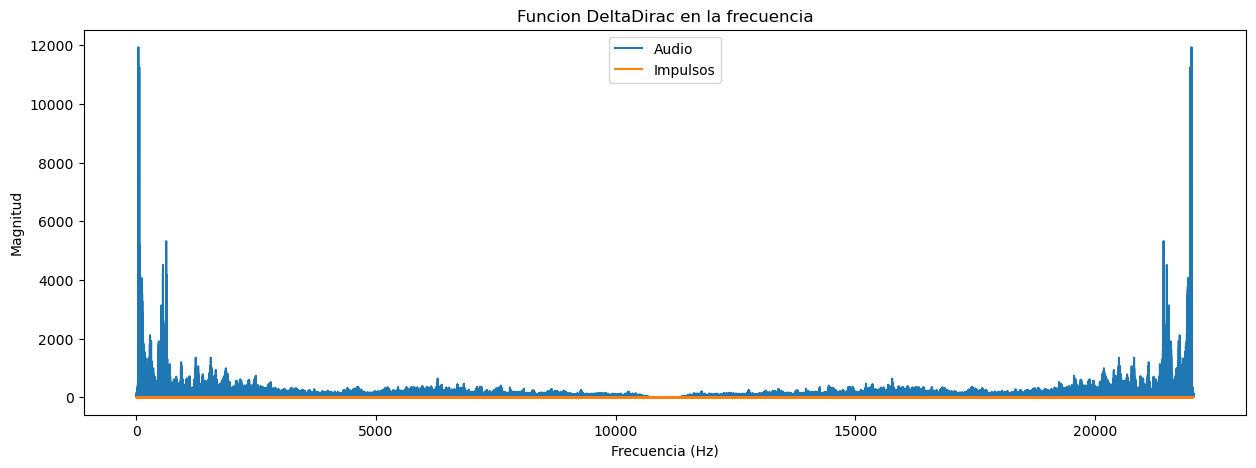

In [26]:
# Calcular la transformada de Fourier del audio y los impulsos
audio_fft = np.fft.fft(audio)
impulsos_fft = np.fft.fft(impulsos)

# Crear un vector de frecuencia con el mismo tamaño que el audio
f = np.linspace(0, sr, len(audio))

# Graficar la magnitud de la transformada de Fourier del audio y los impulsos
plt.plot(f, np.abs(audio_fft), label="Audio")
plt.plot(f, np.abs(impulsos_fft), label="Impulsos")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title('Funcion DeltaDirac en la frecuencia')
plt.legend()
plt.show()


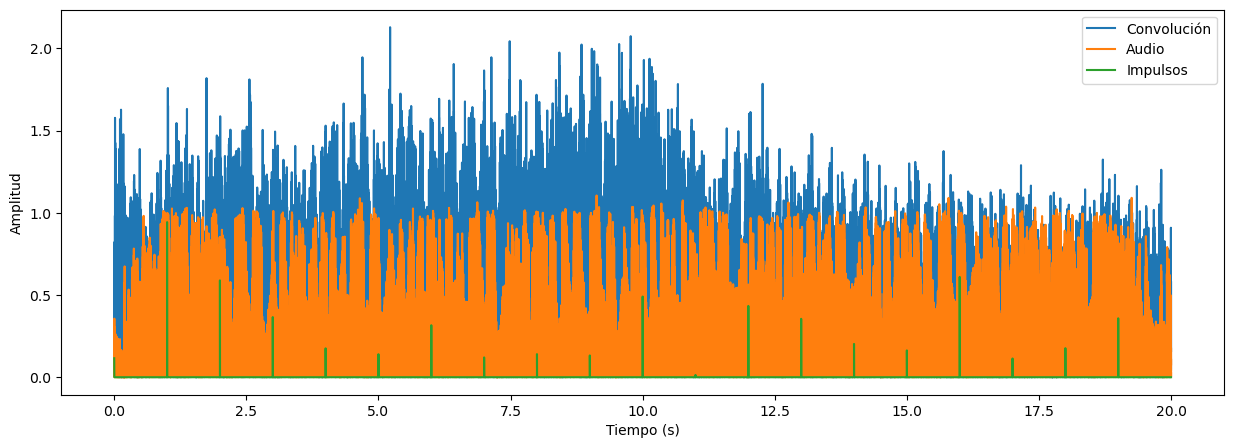

In [27]:
# Convolucionamos el audio y los impulsos en el tiempo
conv = np.convolve(audio, impulsos, mode="same")

# Graficamos el audio, los impulsos y la convolución
plt.plot(t, np.abs(conv), label="Convolución")
plt.plot(t, np.abs(audio), label="Audio")
plt.plot(t, np.abs(impulsos), label="Impulsos")
plt.title('Convolucion en el tiempo')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

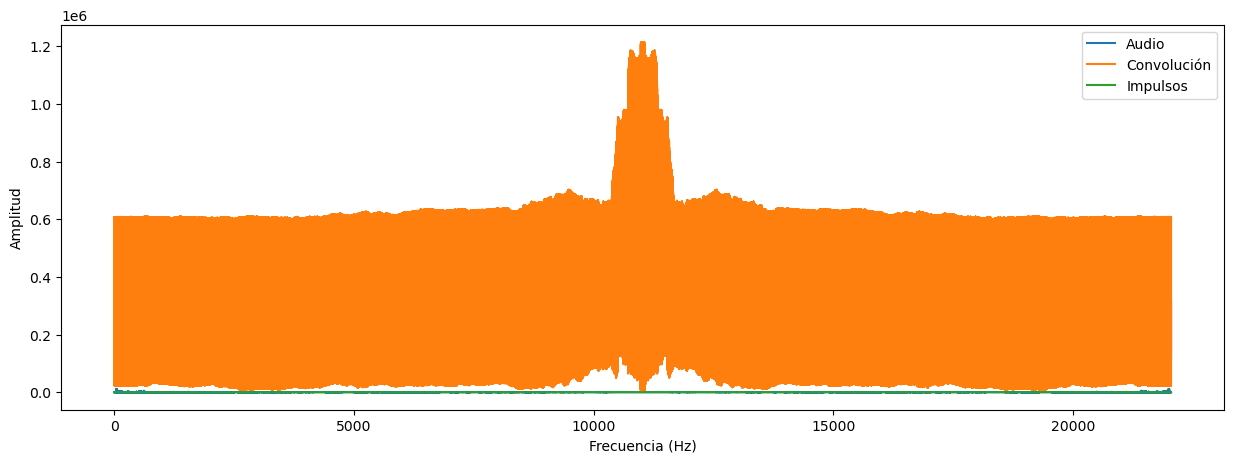

In [28]:
# Convolucionamos el audio y los impulsos en la frecuencia
conv = np.convolve(audio_fft, impulsos_fft, mode="same")

# Graficamos el audio, los impulsos y la convolución
plt.plot(f, np.abs(audio_fft), label="Audio")
plt.plot(f, np.abs(conv), label="Convolución")
plt.plot(f, np.abs(impulsos_fft), label="Impulsos")
plt.title('Convolucion en la frecuencia')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import math
import contextlib

fname = 'audio.wav'
outname = 'filtered.wav'

cutOffFrequency = 400.0                                                               #Frecuencia de corte

def running_mean(x, windowSize):
  cumsum = np.cumsum(np.insert(x, 0, 0))                                              #Suma acumulativa
  return (cumsum[windowSize:] - cumsum[:-windowSize]) / windowSize                    #Promedio

def interpret_wav(raw_bytes, n_frames, n_channels, sample_width, interleaved = True): #Interpretar el archivo de audio

    if sample_width == 1:                                                             #Si el ancho de muestra es 1
        dtype = np.uint8 # unsigned char                                                                                
    elif sample_width == 2:                                                           #Si el ancho de muestra es 2
        dtype = np.int16 # signed 2-byte short
    else:
        raise ValueError("Only supports 8 and 16 bit audio formats.")

    channels = np.fromstring(raw_bytes, dtype=dtype)                                  #Convertir a cadena de bytes

    if interleaved:
        # Los canales se intercalan, por lo que necesitamos desinterlevarlos.
        channels.shape = (n_frames, n_channels)
        channels = channels.T
    else:
        # Los canales no están intercalados, por lo que no necesitamos desinterlevarlos.
        channels.shape = (n_channels, n_frames)

    return channels

with contextlib.closing(wave.open(fname,'rb')) as spf:
    sampleRate = spf.getframerate()                                           #Obtener frecuencia de muestreo
    ampWidth = spf.getsampwidth()                                             #Obtener ancho de muestra
    nChannels = spf.getnchannels()                                            #Obtener numero de canales
    nFrames = spf.getnframes()                                                #Obtener numero de frames

    # Extract Raw Audio from multi-channel Wav File
    signal = spf.readframes(nFrames*nChannels)
    spf.close()
    channels = interpret_wav(signal, nFrames, nChannels, ampWidth, True)

    # get window size
    freqRatio = (cutOffFrequency/sampleRate)
    N = int(math.sqrt(0.196196 + freqRatio**2)/freqRatio)

    # Use moviung average (only on first channel)
    filtered = running_mean(channels[0], N).astype(channels.dtype)

    wav_file = wave.open(outname, "w")
    wav_file.setparams((1, ampWidth, sampleRate, nFrames, spf.getcomptype(), spf.getcompname()))
    wav_file.writeframes(filtered.tobytes('C'))
    wav_file.close()

C:\Users\matif\AppData\Local\Temp\ipykernel_4172\1252659289.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  channels = np.fromstring(raw_bytes, dtype=dtype)
